In [34]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model 
from sklearn.metrics import mean_squared_error
import pandas as pd from sklearn.linear_model 
import matplotlib.pyplot as plt

#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression #-> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

archivo = pd.DataFrame(pd.read_csv("./dta_bicicleta.csv"))

<h1>1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc. </h1>

In [3]:
# Datos principales de la cabecera del archivo 
archivo.head()

,nombre_moto,precio_venta,anio,tipo_vendedor,duenio,km_recorridos,precio_exposicion
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
# Informacion de la cantidad de columnas y filas totales

archivo.shape

(1061, 7)

In [5]:
"""  Informacion detallada de mi archivo cargado, contiene informacion de los datos de la columna, cantidad de valores no nulos y la cantidad 
     de memoria utilizada
"""

archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombre_moto        1061 non-null   object 
 1   precio_venta       1061 non-null   int64  
 2   anio               1061 non-null   int64  
 3   tipo_vendedor      1061 non-null   object 
 4   duenio             1061 non-null   object 
 5   km_recorridos      1061 non-null   int64  
 6   precio_exposicion  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [6]:
# Descripcion estadistica de los datos de mi archivo

archivo.describe()

,precio_venta,anio,km_recorridos,precio_exposicion
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [7]:
# Obtener los tipos de dato de cada columna
tipos_de_dato_por_columna = archivo.dtypes

# Mostrar los tipos de dato en pantalla
print("Tipos de dato por columna:")
print(tipos_de_dato_por_columna)

Tipos de dato por columna:
nombre_moto           object
precio_venta           int64
anio                   int64
tipo_vendedor         object
duenio                object
km_recorridos          int64
precio_exposicion    float64
dtype: object


In [8]:
# Checking Null values
archivo.isnull().sum()*100/archivo.shape[0]
# There are no NULL values in the dataset, hence it is clean.

nombre_moto           0.000000
precio_venta          0.000000
anio                  0.000000
tipo_vendedor         0.000000
duenio                0.000000
km_recorridos         0.000000
precio_exposicion    40.999057
dtype: float64

In [9]:
# Calcular una tabla de contingencia entre dos variables categóricas
tabla_contingencia = pd.crosstab(archivo['precio_venta'], archivo['anio'])

# Visualizar la tabla de contingencia
print(tabla_contingencia)

# Realizar una prueba chi-cuadrado para evaluar la asociación entre las variables categóricas
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(tabla_contingencia)
print(f"Valor p de la prueba chi-cuadrado: {p}")

anio          1988  1991  1993  1995  1997  1998  1999  2000  2001  2002  ...  \
precio_venta                                                              ...   
5000             0     0     0     0     0     1     0     0     0     0  ...   
6000             0     1     0     0     0     0     0     0     0     0  ...   
7500             0     0     0     0     0     0     0     0     0     0  ...   
8000             0     0     0     0     0     0     0     0     0     0  ...   
9000             0     0     0     0     0     0     0     0     0     1  ...   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
330000           0     0     0     0     0     0     0     0     0     0  ...   
365000           0     0     0     0     0     0     0     0     0     0  ...   
425000           0     0     0     0     0     0     0     0     0     0  ...   
750000           0     0     0     0     0     0     0     0     0     0  ...   
760000           0     0    

In [10]:
# Calcular una tabla de contingencia entre dos variables categóricas
tabla_contingencia = pd.crosstab(archivo['tipo_vendedor'], archivo['duenio'])

# Visualizar la tabla de contingencia
print(tabla_contingencia)

# Realizar una prueba chi-cuadrado para evaluar la asociación entre las variables categóricas
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(tabla_contingencia)
print(f"Valor p de la prueba chi-cuadrado: {p}")

duenio         1st owner  2nd owner  3rd owner  4th owner
tipo_vendedor                                            
Dealer                 4          2          0          0
Individual           920        121         11          3
Valor p de la prueba chi-cuadrado: 0.4187933813805399


In [12]:
# Calcular una tabla de contingencia entre dos variables categóricas
tabla_contingencia = pd.crosstab(archivo['precio_venta'], archivo['nombre_moto'])

# Visualizar la tabla de contingencia
print(tabla_contingencia)

# Realizar una prueba chi-cuadrado para evaluar la asociación entre las variables categóricas
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(tabla_contingencia)
print(f"Valor p de la prueba chi-cuadrado: {p}")

nombre_moto   Activa 3g  Activa 4g  Aprilia SR 125  BMW G310GS  Bajaj  ct 100  \
precio_venta                                                                    
5000                  0          0               0           0              0   
6000                  0          0               0           0              0   
7500                  0          0               0           0              0   
8000                  0          0               0           0              0   
9000                  0          0               0           0              0   
...                 ...        ...             ...         ...            ...   
330000                0          0               0           0              0   
365000                0          0               0           0              0   
425000                0          0               0           0              0   
750000                0          0               0           0              0   
760000                0     

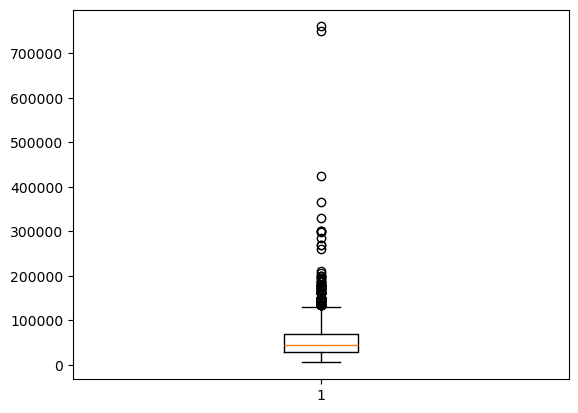

In [13]:
# Valores atipicos del precio
plt.boxplot(archivo.precio_venta)
Q1 = archivo.precio_venta.quantile(0.25)
Q3 = archivo.precio_venta.quantile(0.75)
IQR = Q3 - Q1
archivo = archivo[(archivo.precio_venta >= Q1 - 1.5*IQR) & (archivo.precio_venta <= Q3 + 1.5*IQR)]

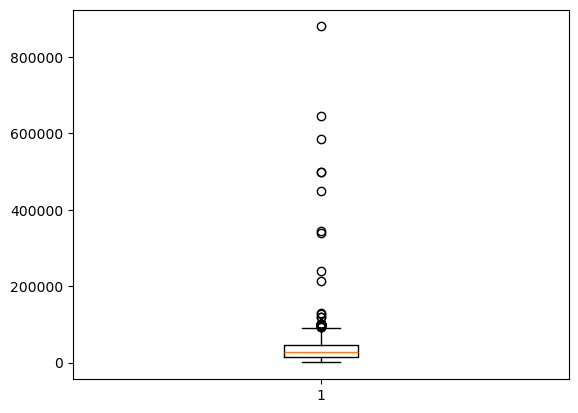

In [14]:
# Valores atipicos del àrea
plt.boxplot(archivo.km_recorridos)
Q1 = archivo.km_recorridos.quantile(0.25)
Q3 = archivo.km_recorridos.quantile(0.75)
IQR = Q3 - Q1
archivo = archivo[(archivo.km_recorridos >= Q1 - 1.5*IQR) & (archivo.km_recorridos <= Q3 + 1.5*IQR)]

In [15]:
# Comprobar datos nulos
archivo.isnull().sum()*100/archivo.shape[0]

nombre_moto           0.000000
precio_venta          0.000000
anio                  0.000000
tipo_vendedor         0.000000
duenio                0.000000
km_recorridos         0.000000
precio_exposicion    39.978678
dtype: float64

Text(0.5, 1.0, 'Valores Atípicos del año del vehiculo')

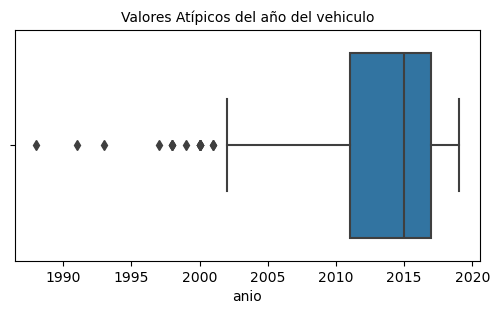

In [18]:
#Identificación de Datos Faltantes y Atípicos del año del vehiculo

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['anio'])
plt.title('Valores Atípicos del año del vehiculo', fontsize=10 )

Text(0.5, 1.0, 'Valores Atípicos de los asientos de los vehiculos')

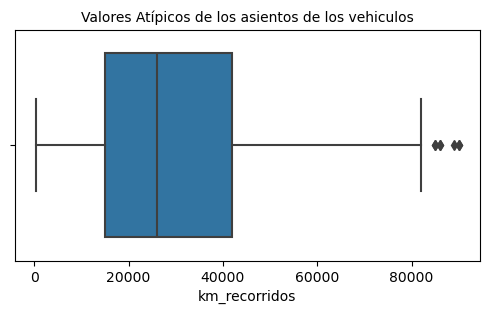

In [20]:
#Identificación de Datos Faltantes y Atípicos de los asientos de los vehiculos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['km_recorridos'])
plt.title('Valores Atípicos de los kilometros recorridos de los vehiculos', fontsize=10 )

Text(0.5, 1.0, 'Valores Atípicos del precio de venta del vehiculo')

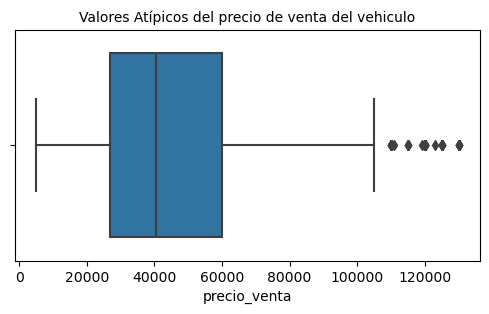

In [24]:
#Identificación de Datos Faltantes y Atípicos de los asientos de los vehiculos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['precio_venta'])
plt.title('Valores Atípicos del precio de venta del vehiculo', fontsize=10 )

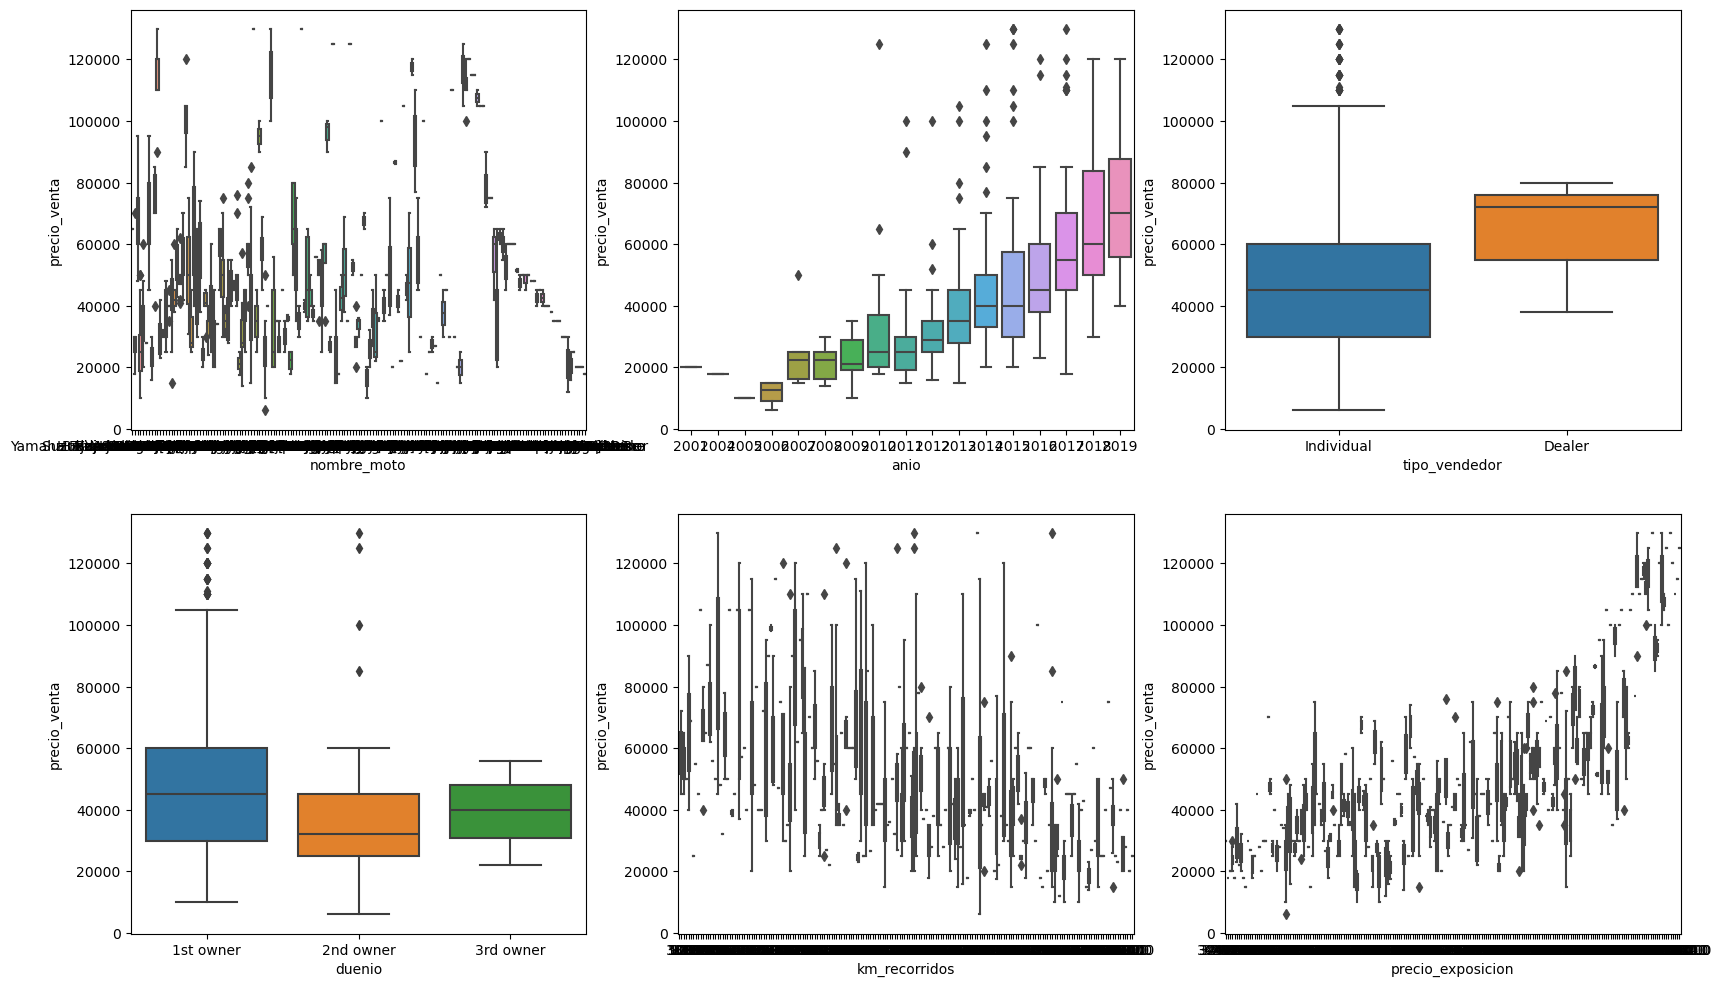

In [40]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'nombre_moto', y = 'precio_venta', data = archivo)
plt.subplot(2,3,2)
sns.boxplot(x = 'anio', y = 'precio_venta', data = archivo)
plt.subplot(2,3,3)
sns.boxplot(x = 'tipo_vendedor', y = 'precio_venta', data = archivo)
plt.subplot(2,3,4)
sns.boxplot(x = 'duenio', y = 'precio_venta', data = archivo)
plt.subplot(2,3,5)
sns.boxplot(x = 'km_recorridos', y = 'precio_venta', data = archivo)
plt.subplot(2,3,6)
sns.boxplot(x = 'precio_exposicion', y = 'precio_venta', data = archivo)
plt.show()

<h1>2. Procesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario</h1>

In [29]:
# Búsqueda de registros vacios
registros_vacios = archivo.isnull().sum()
print (registros_vacios)

nombre_moto          0
precio_venta         0
anio                 0
tipo_vendedor        0
duenio               0
km_recorridos        0
precio_exposicion    0
dtype: int64


In [26]:
# Guarda la cantidad de registros antes de eliminar los nulos
registros_antes = len(archivo)

# Elimina los registros nulos
archivo = archivo.dropna()

# Guarda la cantidad de registros después de eliminar los nulos
registros_despues = len(archivo)

# Calcula la cantidad de registros eliminados
registros_eliminados = registros_antes - registros_despues

print("Cantidad de registros eliminados:", registros_eliminados)

Cantidad de registros eliminados: 0


In [29]:
# Validacion de registros vacios
registros_vacios = archivo.isnull().sum()
print (registros_vacios)

nombre_moto          0
precio_venta         0
anio                 0
tipo_vendedor        0
duenio               0
km_recorridos        0
precio_exposicion    0
dtype: int64


<h1>3 Seleccionar las características más relevantes para entrenar el modelo utilizando seleccion de caracteristicas</h1>

In [30]:
#  3 Seleccionar las características más relevantes para entrenar el modelo utilizando seleccion de caracteristicas

# PREDECIR EL VALOR DE VENTA DEL VEHICULO

# Total de personas con Diabetes

archivo['precio_venta'].value_counts()

precio_venta
50000    47
25000    44
45000    43
35000    37
40000    37
         ..
17500     1
57000     1
14900     1
87000     1
12000     1
Name: count, Length: 76, dtype: int64

In [32]:
archivo[['precio_venta']].head(50)

,precio_venta
3,65000
5,18000
6,78500
9,50000
10,35000
11,28000
12,80000
15,25000
17,40000
19,120000


<h1>4. Dividir el dataset en Train y Test para evaluar correctamente el modelo</h1>

In [35]:
X = archivo.drop ("precio_venta", axis=1)
y = archivo ["precio_venta"]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size =0.25)

In [36]:
# Consultar X

print (X_train)

                        nombre_moto  anio tipo_vendedor     duenio  \
607            Honda CB Hornet 160R  2017    Individual  1st owner   
887                Bajaj Pulsar 180  2017        Dealer  1st owner   
813                Honda CB Twister  2014    Individual  1st owner   
189            Honda CB Unicorn 150  2007    Individual  1st owner   
453                Honda CB Unicorn  2010    Individual  1st owner   
...                             ...   ...           ...        ...   
1003               Yamaha FZ  v 2.0  2018    Individual  1st owner   
15    Suzuki Access 125 [2007-2016]  2012    Individual  1st owner   
441             Bajaj Discover 150S  2015    Individual  1st owner   
268                       Bajaj V15  2016    Individual  1st owner   
244               Hero Maestro Edge  2017    Individual  1st owner   

      km_recorridos  precio_exposicion  
607           35000            87719.0  
887            7850            85011.0  
813           12566            49150

In [37]:
# Consultar Y
print (y_train)

607     70000
887     72000
813     70000
189     50000
453     45000
        ...  
1003    60000
15      25000
441     35000
268     40000
244     40000
Name: precio_venta, Length: 422, dtype: int64


<h1>5. Entrenar el modelo configurando los diferentes hiperparámetros</h1>

In [41]:
# Transformar categoricas a numeros
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_features = ["nombre_moto","anio","tipo_vendedor","duenio","km_recorridos","precio_exposicion"]
one_hot = OneHotEncoder ()
transformer = ColumnTransformer ([("one_hot",one_hot,categorical_features)], remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<563x576 sparse matrix of type '<class 'numpy.float64'>'
	with 3378 stored elements in Compressed Sparse Row format>

In [42]:
pd.DataFrame(transformed_X)

,0
0,"(0, 149)\t1.0\n (0, 173)\t1.0\n (0, 179)\t..."
1,"(0, 82)\t1.0\n (0, 168)\t1.0\n (0, 179)\t1..."
2,"(0, 78)\t1.0\n (0, 176)\t1.0\n (0, 179)\t1..."
3,"(0, 14)\t1.0\n (0, 174)\t1.0\n (0, 179)\t1..."
4,"(0, 144)\t1.0\n (0, 173)\t1.0\n (0, 179)\t..."
...,...
558,"(0, 31)\t1.0\n (0, 168)\t1.0\n (0, 179)\t1..."
559,"(0, 2)\t1.0\n (0, 175)\t1.0\n (0, 179)\t1...."
560,"(0, 87)\t1.0\n (0, 170)\t1.0\n (0, 179)\t1..."
561,"(0, 14)\t1.0\n (0, 171)\t1.0\n (0, 179)\t1..."


In [45]:

dummies = pd.get_dummies(archivo[["nombre_moto","anio","tipo_vendedor","duenio","km_recorridos","precio_exposicion"]])
dummies

,anio,km_recorridos,precio_exposicion,nombre_moto_Activa 3g,nombre_moto_Activa 4g,nombre_moto_Bajaj ct 100,nombre_moto_Bajaj Avenger 150,nombre_moto_Bajaj Avenger 150 street,nombre_moto_Bajaj Avenger 220,nombre_moto_Bajaj Avenger 220 dtsi,...,nombre_moto_Yamaha Saluto RX,nombre_moto_Yamaha YBR 125,nombre_moto_Yamaha YZF R15 S,nombre_moto_Yamaha YZF R15 [2011-2018],nombre_moto_Yo Style,tipo_vendedor_Dealer,tipo_vendedor_Individual,duenio_1st owner,duenio_2nd owner,duenio_3rd owner
3,2015,23000,89643.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
5,2010,60000,53857.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
6,2018,17000,87719.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
9,2016,42000,60122.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
10,2015,32000,78712.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,2010,50000,78700.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1055,2017,35000,32000.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1057,2012,33000,51000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1058,2013,35000,57000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor ()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2830302385228275

In [48]:

import numpy as np  # Agregar esta línea para importar NumPy
# Leer el modelo
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
model.score(X_test, y_test)

0.2830302385228275

In [50]:
X.head()

,nombre_moto,anio,tipo_vendedor,duenio,km_recorridos,precio_exposicion
3,Yamaha Fazer FI V 2.0 [2016-2018],2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,2016,Individual,1st owner,42000,60122.0
10,Yamaha FZ16,2015,Individual,1st owner,32000,78712.0


In [55]:
# Transformar categoricas a numeros
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_features = ["nombre_moto","anio","tipo_vendedor","duenio","km_recorridos","precio_exposicion"]
one_hot = OneHotEncoder ()
transformer = ColumnTransformer ([("one_hot",one_hot,categorical_features)], remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<563x576 sparse matrix of type '<class 'numpy.float64'>'
	with 3378 stored elements in Compressed Sparse Row format>

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Seleccionar características y variable objetivo
X = archivo[['anio', 'km_recorridos', 'precio_exposicion','']]  # Características
y = archivo['precio_venta']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)


Error cuadrático medio (MSE): 150845794.05704442


In [76]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 150845794.05704442
Coeficiente de determinación (R²): 0.8141313336428146


In [73]:
# Construir el modelo de regresión lineal 

modelo_regresion = LinearRegression()
modelo_regresion.fit (X_train , y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

<h1>6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.</h1>

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, Prediccion)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, Prediccion)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, Prediccion)

# Imprimir las métricas
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 150845794.05704442
Error absoluto medio (MAE): 9440.962868307222
Coeficiente de determinación (R²): 0.8141313336428146


<h1>7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.</h1>

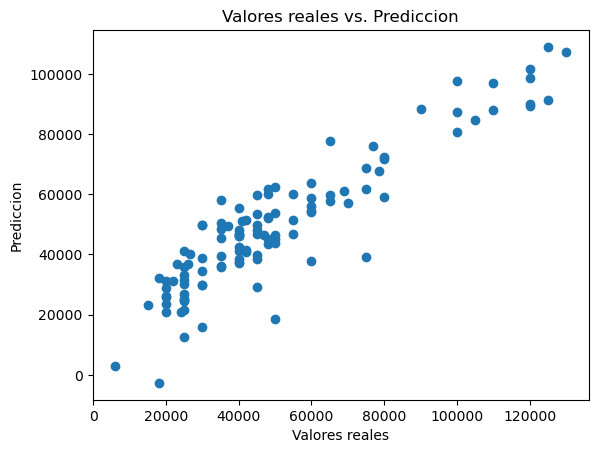

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Prediccion")
plt.title("Valores reales vs. Prediccion")
plt.show()


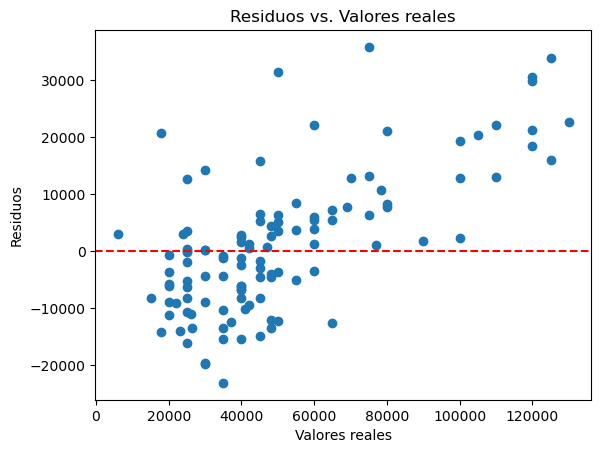

In [81]:
residuos = y_test - Prediccion
plt.scatter(y_test, residuos)
plt.xlabel("Valores reales")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores reales")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [98]:
test_residual= y_test - y_pred

In [102]:
import hvplot.pandas

pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

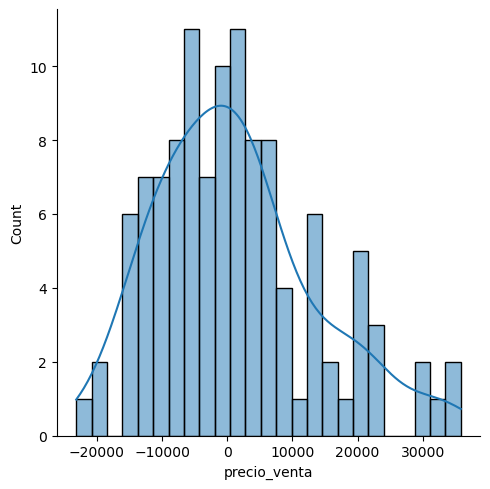

In [103]:
sns.displot(test_residual, bins=25, kde=True)

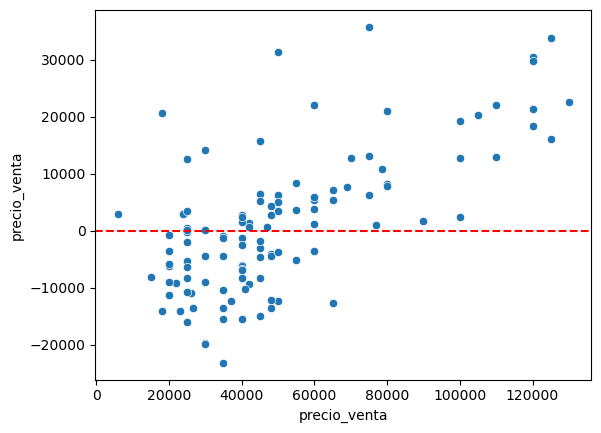

In [110]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')

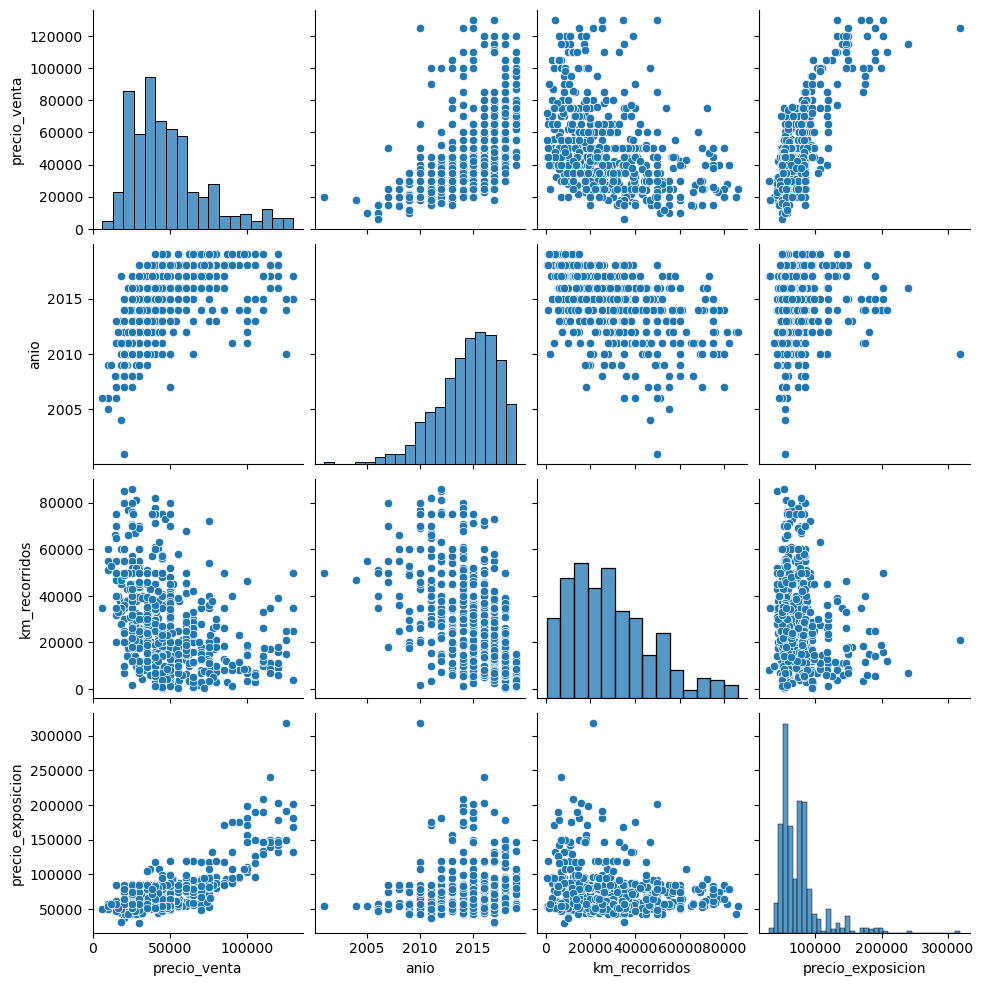

In [111]:
sns.pairplot(archivo)
plt.show()

Coeficientes del modelo de regresión lineal:
anio                                       3109.928395
km_recorridos                                -0.069815
precio_exposicion                             0.253878
tipo_vendedor_Individual                  -8436.263218
nombre_moto_Activa 4g                     -7292.442765
                                              ...     
nombre_moto_Yamaha YZF R15 S              19176.901590
nombre_moto_Yamaha YZF R15 [2011-2018]    18111.676890
nombre_moto_Yo Style                       1577.299486
duenio_2nd owner                          -4054.792855
duenio_3rd owner                           5028.896373
Length: 166, dtype: float64


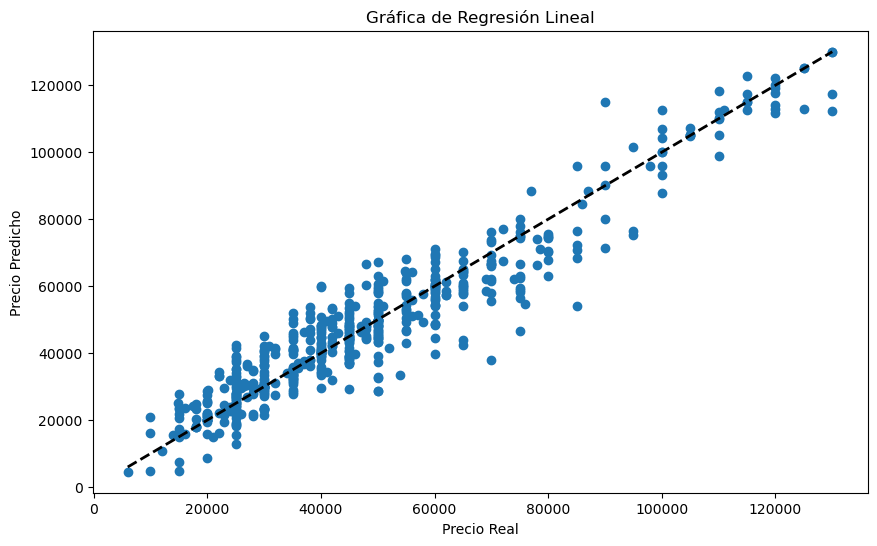

In [116]:
# Seleccionar las columnas relevantes
columnas_relevantes = ['precio_venta', 'anio', 'km_recorridos', 'tipo_vendedor', 
                       'nombre_moto', 'duenio', 'precio_exposicion']

# Filtrar el DataFrame con las columnas relevantes
df_relevante = archivo[columnas_relevantes]

# Convertir variables categóricas en variables dummy (si es necesario)
df_relevante = pd.get_dummies(df_relevante, drop_first=True)

# Eliminar filas con valores faltantes
df_relevante = df_relevante.dropna()

# Separar la variable objetivo (Precio_venta) del resto de las variables
X = df_relevante.drop('precio_venta', axis=1)
y = df_relevante['precio_venta']

# Inicializar y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los coeficientes del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Imprimir los coeficientes para interpretar la tendencia
print("Coeficientes del modelo de regresión lineal:")
print(coeficientes)

# Predicciones del modelo
predicciones = modelo.predict(X)

# Gráfica de regresión lineal
plt.figure(figsize=(10, 6))
plt.scatter(y, predicciones)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Línea de referencia y=x
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Gráfica de Regresión Lineal')
plt.show()


<h1>8. Interpretar, analizar y documentar los resultados obtenidos</h1>

<p>En resumen, los resultados sugieren que el modelo de regresión lineal tiene un buen ajuste general a los datos, ya que el coeficiente de determinación R² es alto. Sin embargo, el alto MSE y MAE indican que las predicciones del modelo podrían tener un error considerable, los valores que se visualizan en la gráfica de regresión lineal indican que el modelo se le realizó un buen ajuste con los datos relacionados.</p>

<p>Adicionalmente en la dispersión de los puntos, está haciendo predicciones consistentes en toda la gama de valores reales en los resultados del precio real vs precios predichos, está generando puntos tanto positivos como negativos, pero se mantienen en la línea diagonal, se podría mejorar, ya que no necesariamente significa que el modelo esté fallando.</p>